In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.DataFrame({'Mileage':[15,14,17,7,10,7,20,21,18,11,7.9,8.6,12.3,17.1,19.4],
                 'Premium':[175.5,110.2,95.7,260.2,185.4,200.9,56.9,77.5,150,120.3,250,220,217.5,140.88,97.25]})

In [3]:
x=data['Mileage']
y=data['Premium']

In [37]:
#y.values.reshape(-1,1)

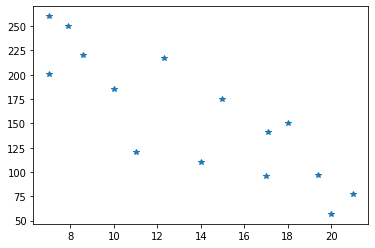

In [6]:
plt.plot(x,y,"*")

In [7]:
data.corr()

,Mileage,Premium
Mileage,1.000000,-0.850834
Premium,-0.850834,1.000000


In [16]:
# can i take b1 value as 1 ??? No because it is negatively correalted.
# Lets assume
b1=-1
b0=250

In [17]:
yreg= b1*x +b0

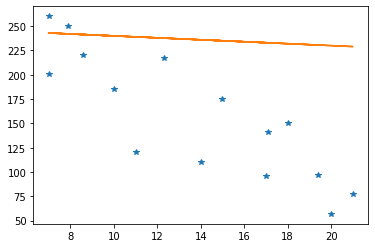

In [18]:
plt.plot(x,y,"*")
plt.plot(x,yreg)
# its a poor fit

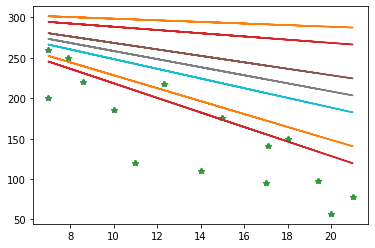

In [38]:
for b1 in [-1,-2,-4,-5,-6,-8,-9]:
    plt.plot(x,y,"*")
    plt.plot(x,b1*x+b0)
    
# Explore for differnt coefficients

In [39]:
# Use the formlua we have derived using OLS to compute b1 and b0

b1=np.sum((x-x.mean())*(y-y.mean())) / np.sum((x-x.mean())**2)

In [40]:
b1

-11.057345018753576

In [41]:
b0=y.mean()-b1*x.mean()
b0

308.5535288233406

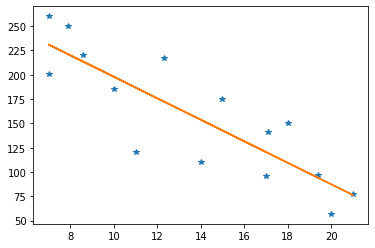

In [42]:
plt.plot(x,y,"*")
plt.plot(x,b1*x+b0)

In [25]:
# residue - difference between actual and predicted(fitted) value
yreg=b1*x+b0 # fitted value
residue=y-yreg
residue

#The first observation residue is 32.8, which tells that actual value is 32 units more than predicted value.
#the second observation reside is -43.55, then means the actual value is 43 units less than predicted

0     32.806646
1    -43.550699
2    -24.878664
3     29.047886
4    -12.580079
5    -30.252114
6    -30.506628
7      1.150717
8     40.478682
9    -66.622734
10    28.799497
11     6.539638
12    44.951815
13    21.407071
14     3.208965
dtype: float64

In [43]:
np.sum(residue)
#Sum of residue close to zero is the indicator of the balanced position line, 
#but it doesn't mean the total error of the model is less

-1.8474111129762605e-13

In [27]:
#sum of square error
sse = np.sum((y-yreg)**2)
sse

15879.610267170086

In [28]:
#mean square error
mse=np.mean((y-yreg)**2)
mse

1058.6406844780058

In [30]:
# Root mean square error
rmse=np.sqrt(mse)
rmse

32.53675897316765

In [32]:
# Variance measure
# SST - Sum of Square of Total 
    # sum of square Differnce between the mean model value(average of output) and actual value
# SSR - sum of Square of Regression 
    # sum of square Differnce between the mean model output and regression model output(yreg) 
# SSE - sum of square of error
    # sum of square Differnce between the actual output and regression model output (yreg)

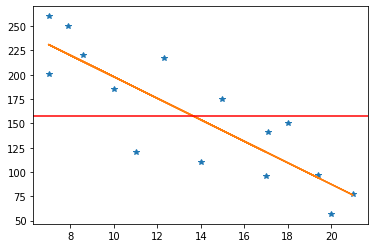

In [33]:
plt.plot(x,y,"*") # actual output
plt.plot(x,b1*x+b0) # reression model
plt.axhline(y.mean(),color='r') # mean model

In [34]:
sst = np.sum((y.mean() - y)**2)
ssr = np.sum((y.mean()-yreg)**2)
sse = np.sum((y-yreg)**2)

In [35]:
sst,ssr,sse

(57517.81137333333, 41638.201106163266, 15879.610267170086)

In [44]:
ssr+sse  # sst = ssr+sse

57517.81137333335

In [45]:
r_square = ssr/sst  #--- models explained variance out of total varaince

# generally vary from 0 to 1

In [46]:
r_square

0.7239183847921543

In [47]:
# The constructed linear regression model abilty to explain the variance in the output is by 72%

In [48]:
import statsmodels.api as sm

In [50]:
xc=sm.add_constant(x)

In [51]:
x.head(2)

0    15.0
1    14.0
Name: Mileage, dtype: float64

In [52]:
xc.head(2)

,const,Mileage
0,1.0,15.0
1,1.0,14.0


In [53]:
xc=sm.add_constant(x)
ols=sm.OLS(y,xc)
ols_mod=ols.fit()
ols_mod.summary()

C:\Users\senthil kumar\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     34.09
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           5.79e-05
Time:                        10:25:04   Log-Likelihood:                -73.520
No. Observations:                  15   AIC:                             151.0
Df Residuals:                      13   BIC:                             152.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.5535     27.447     11.242      0.000     249.258     367.849
Mileage      -11.0573      1.894     -5.838      0.000     -15.149      -6.966
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.908
Skew:                          -0.389   Prob(JB):                        0.635
Kurtosis:                       2.079   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# H0 : All the input feature coefficients are zero

#p value is less than 0.05, so we are rejecting the null hypothesis, 
#which means the model input features are significant, in other words my model is not a mean model

In [ ]:
#b1 (mileage coeff) = -11.0573

# for every one unit of increase in mileage the premium amount will decrease by 11.0573 units,
# provided all other inputs are remain constant.

In [55]:
sse

15879.610267170086

In [57]:
k=1 # no of input feature
mse = sse/(len(x)-k-1)

In [58]:
rmse=np.sqrt(mse)

In [59]:
std_err=rmse / np.sqrt(np.sum((x-x.mean())**2))

In [60]:
std_err

1.8938829107553148

In [ ]:
#ttset
# H0: The corresponding input variabe coefficient is zero

In [61]:
# tstat= (est_coef - true_coef) / std_err

tstat=(-11.0573 - 0)/std_err
tstat

-5.8384285201613375

In [66]:
from scipy import stats as stats
t_table_value=stats.t.ppf(0.05/2,len(x)-2)
t_table_value

-2.160368656461013

In [63]:
# Automobile expert saying that one unit increase in milage will reduce the premium by 20 units ? 
# Can we accept his openion? 
# use 20 in place of true value in tstat formula and analyse
# Also can use Confidence Interval to make decision about his statement.
#Confidence interval is 15 to 6, 20 is out of this rance, so we can reject his statement.